# The Titanic Dataset
The Titanic dataset is a classic example used for data analysis and machine learning purposes. It contains information about passengers on the Titanic, including features like age, gender, ticket class, fare, survival status, etc

## import the libraries
Generally you must include pandas, seaborn, matplotlib 

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the Titanic Dataset   

In [74]:
# Load the Titanic dataset from Seaborn
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [75]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
titanic_df.shape

(891, 15)

In [77]:
titanic_df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [78]:
titanic_df.loc[titanic_df["sex"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


## Analysis of passenger types

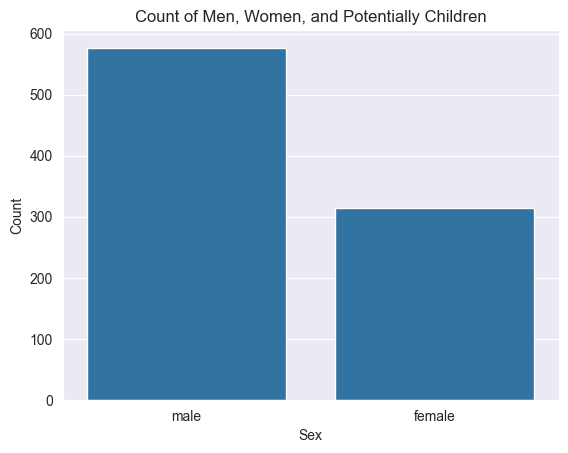

In [79]:
# Create a countplot using Seaborn to visualize counts of men, women
sns.countplot(x='sex', data=titanic_df)
plt.title('Count of Men, Women, and Potentially Children')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


## Count the number of adult males, adult women, male children and female children 


In [80]:
# count the number of adult males,  
# Define criteria for categorizing children (e.g., age below 18)
child_age_threshold = 18

# Count the number of men, women, and children
num_men = titanic_df[titanic_df['sex'] == 'male']['sex'].count()
num_women = titanic_df[titanic_df['sex'] == 'female']['sex'].count()
num_children = titanic_df[titanic_df['age'] < child_age_threshold]['age'].count()

# Categorize individuals as men, women, or children based on age. pd.cut is used to bin the data into two groups 0-18 and 18-infinitive. They will be called child and adult
titanic_df['Category'] = pd.cut(titanic_df['age'], bins=[0, child_age_threshold, float('inf')], labels=['Child', 'Adult'])

# Replace NaN values in 'Category' column with 'Adult'
titanic_df['Category'].fillna('Adult', inplace=True)

print(f"Number of men: {num_men}")
print(f"Number of women: {num_women}")
print(f"Number of children: {num_children}")


Number of men: 577
Number of women: 314
Number of children: 113


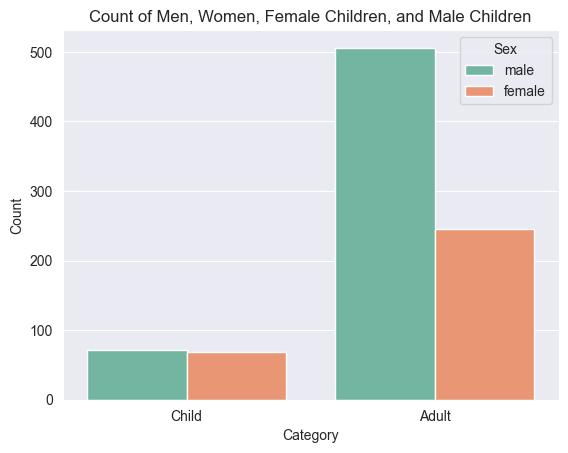

In [81]:
# Create a countplot using Seaborn to visualize counts of men, women, and children
sns.countplot(x='Category', hue='sex', data=titanic_df, palette='Set2')
plt.title('Count of Men, Women, Female Children, and Male Children')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

### Add the value on top of the bars

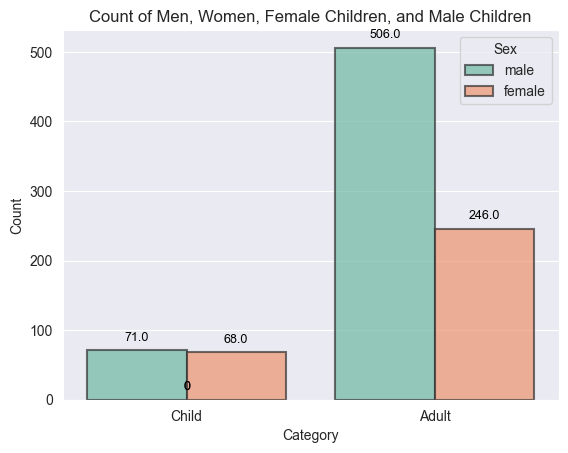

In [82]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Create a countplot using Seaborn to visualize counts of men, women, female children, and male children (here we add some features)
ax = sns.countplot(x='Category', hue='sex', data=titanic_df, palette='Set2',
                   dodge=True, linewidth=1.5, edgecolor='.2',
                   saturation=0.8, alpha=0.7)

plt.title('Count of Men, Women, Female Children, and Male Children')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sex')
add_count_on_bars(ax)
plt.show()

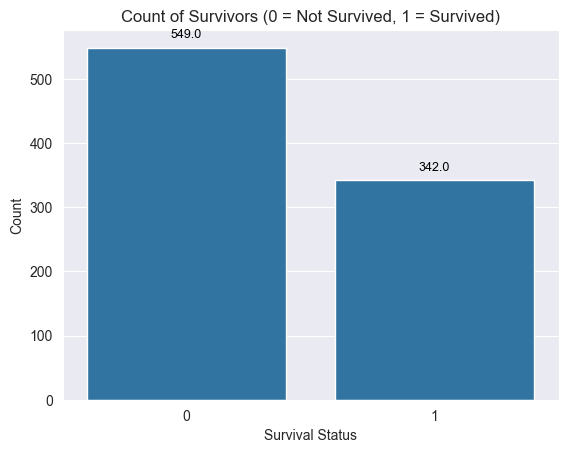

In [83]:
    # Create a bar plot to show the count of survivors
ax = sns.countplot(x='survived', data=titanic_df)
plt.title('Count of Survivors (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
add_count_on_bars(ax)
plt.show()

## Analyse the survival of passengers 

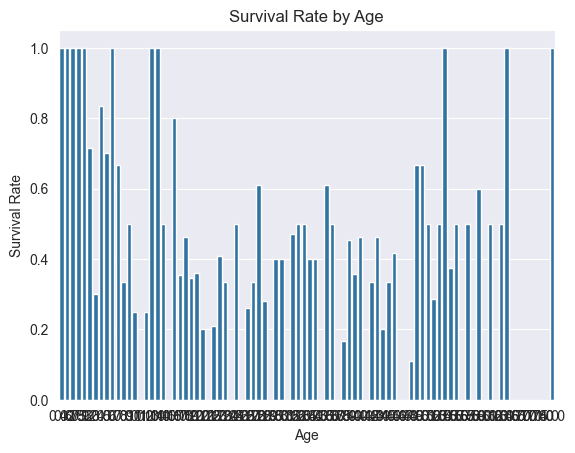

In [84]:
# Group data by age and calculate the survival rate
age_survival = titanic_df.groupby('age')['survived'].mean().reset_index()

# Create a line plot using Seaborn
sns.barplot(x='age', y='survived', data=age_survival)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

 binning values makes sense
The following creates a new column age_group where:
- Ages 0-12 are categorized as 'Child'.
- Ages 13-18 are categorized as 'Teen'.
- Ages 19-35 are categorized as 'Young Adult'.
- Ages 36-60 are categorized as 'Adult'.
- Ages 61 and above are categorized as 'Senior'.

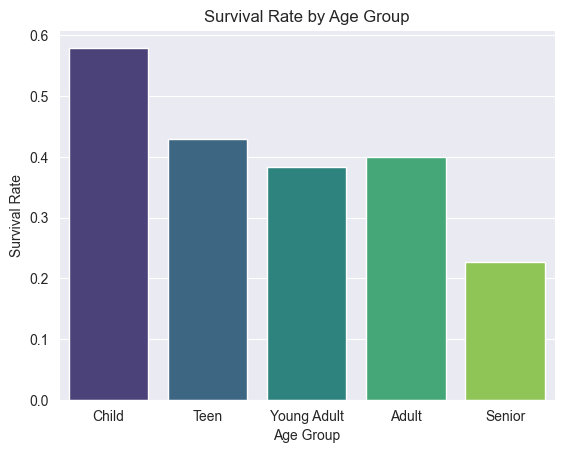

In [104]:
# Define age bins
bins = [0, 12, 18, 35, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Add a new column for age bins
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=bins, labels=labels)

# Group by age group and calculate the survival rate
age_group_survival = titanic_df.groupby('age_group', observed=False)['survived'].mean().reset_index()
# Create a bar plot using Seaborn
sns.barplot(x='age_group', y='survived', data=age_group_survival, hue='age_group', palette='viridis', dodge=False, legend=False)

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

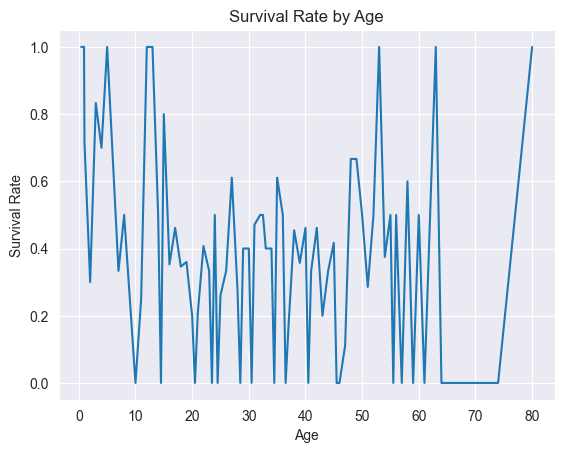

In [85]:
sns.lineplot(x='age', y='survived', data=age_survival)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

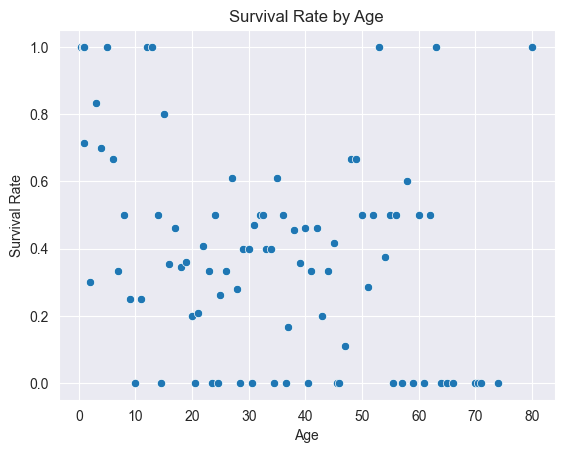

In [86]:
sns.scatterplot(x='age', y='survived', data=age_survival)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

## Distribution of age across different classes

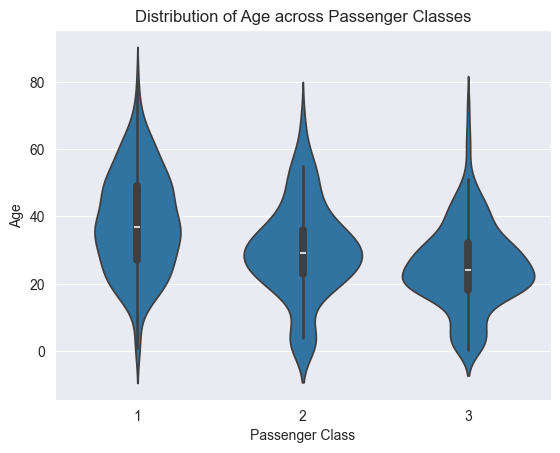

In [87]:
# Create a violin plot to show the distribution of age across different classes
sns.violinplot(x='pclass', y='age', data=titanic_df)
plt.title('Distribution of Age across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


### The Power of hue

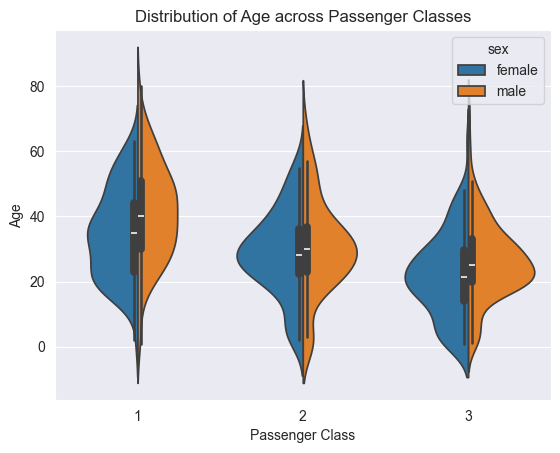

In [107]:
# Create a violin plot to show the distribution of age across different classes
sns.violinplot(x='pclass', y='age', hue='sex', data=titanic_df, split=True)
plt.title('Distribution of Age across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

## Scatter Plot - Fare vs. Age with Survival Status

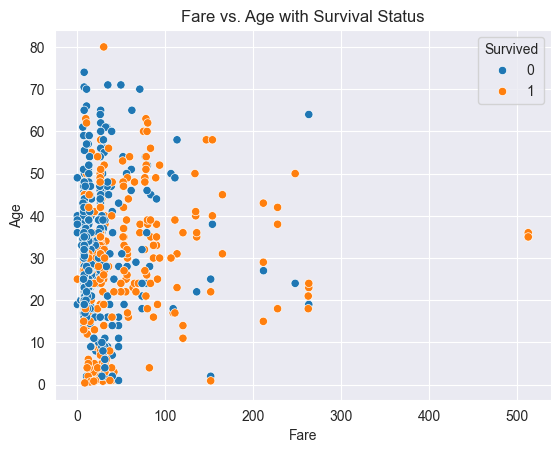

In [89]:
# Create a scatter plot to visualize fare vs. age with survival status differentiation
sns.scatterplot(x='fare', y='age', data=titanic_df, hue='survived')
plt.title('Fare vs. Age with Survival Status')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()


## Survival rate Vs embarked

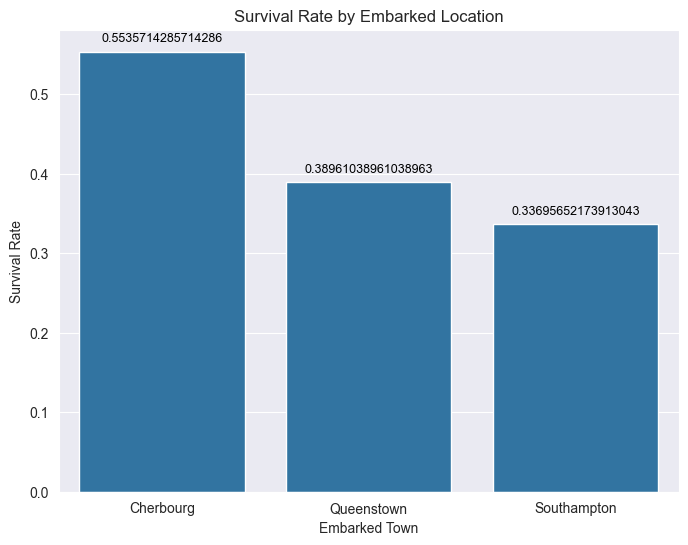

In [90]:
# Calculate survival rate by 'embarked' location
# Each group corresponds to passengers who embarked at a specific town (e.g., 'Southampton', 'Cherbourg', 'Queenstown').
#Calculates the mean of the survived column for each group: Since the survived column contains binary values (1 or 0), the mean represents the proportion of passengers who survived in each embarkation town.
# reset index converts the grouped data (a pandas.Series) back into a structured DataFrame.

embarked_survival_rate = titanic_df.groupby('embark_town')['survived'].mean().reset_index()

# Create a bar plot using Seaborn to visualize survival rates by 'embarked' location
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='embark_town', y='survived', data=embarked_survival_rate)
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked Town')
plt.ylabel('Survival Rate')
add_count_on_bars(ax)
plt.show()

In [91]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Category'],
      dtype='object')

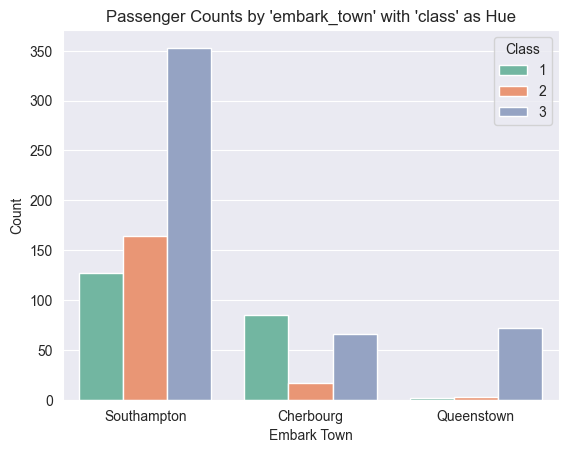

In [108]:
# Calculate passenger class by 'embarked' location
sns.countplot(x='embark_town', hue='pclass', data=titanic_df, palette='Set2')
plt.title("Passenger Counts by 'embark_town' with 'class' as Hue")
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.legend(title='Class')
add_count_on_bars(ax)
plt.show()

In [93]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Category'],
      dtype='object')

## Stacked charts

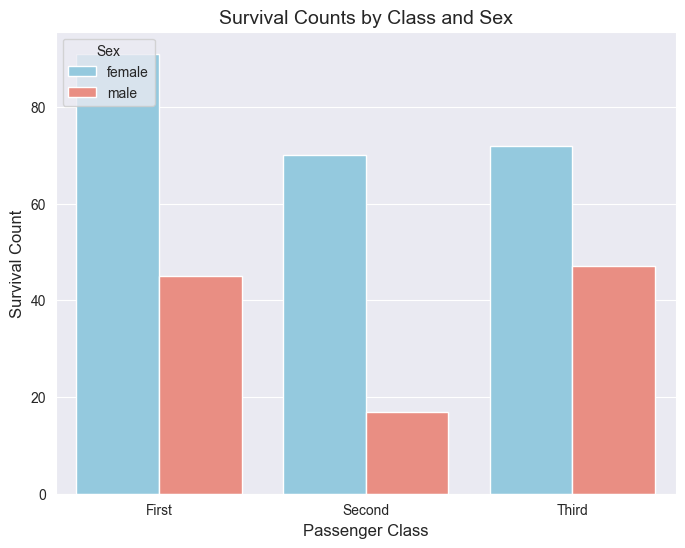

In [110]:
# Create a stacked bar plot showing survival counts based on 'class' and 'sex'
# seaborn does not support stacked charts so we use pandas

# Grouping by 'class' and 'sex' and calculating survival counts
survival_counts = titanic_df.groupby(['class', 'sex'], observed=False)['survived'].sum().unstack()

# Plotting a stacked bar chart
survival_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))

plt.title('Survival Counts by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=0)
plt.show()


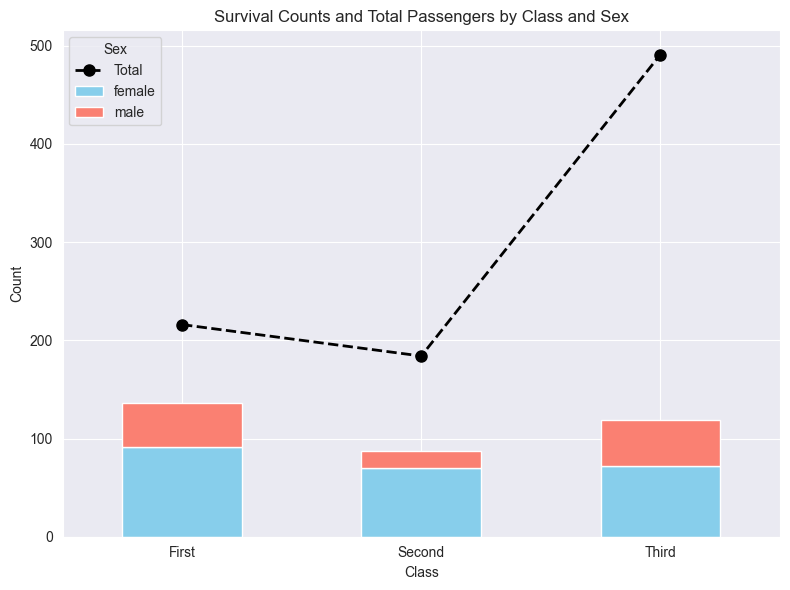

In [112]:
# but how does this relate to the total population?

# Calculate survival counts by 'class' and 'sex'
# unstack transforms a double nesting of groups into a column
#(we would have sex nested into calss and then we want to count survived. This turns survived into a column
survival_counts = titanic_df.groupby(['class', 'sex'],observed=False)['survived'].sum().unstack()

# Calculate total counts by 'class' and 'sex'
total_counts = titanic_df.groupby(['class', 'sex'], observed=False)['survived'].count().unstack()

# Plotting a stacked bar chart with total counts
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars for survived passengers
survival_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

# Total counts as line markers
total_counts.sum(axis=1).plot(marker='o', color='black', linestyle='dashed', linewidth=2, markersize=8, label='Total')

plt.title('Survival Counts and Total Passengers by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [96]:
### Pairlots

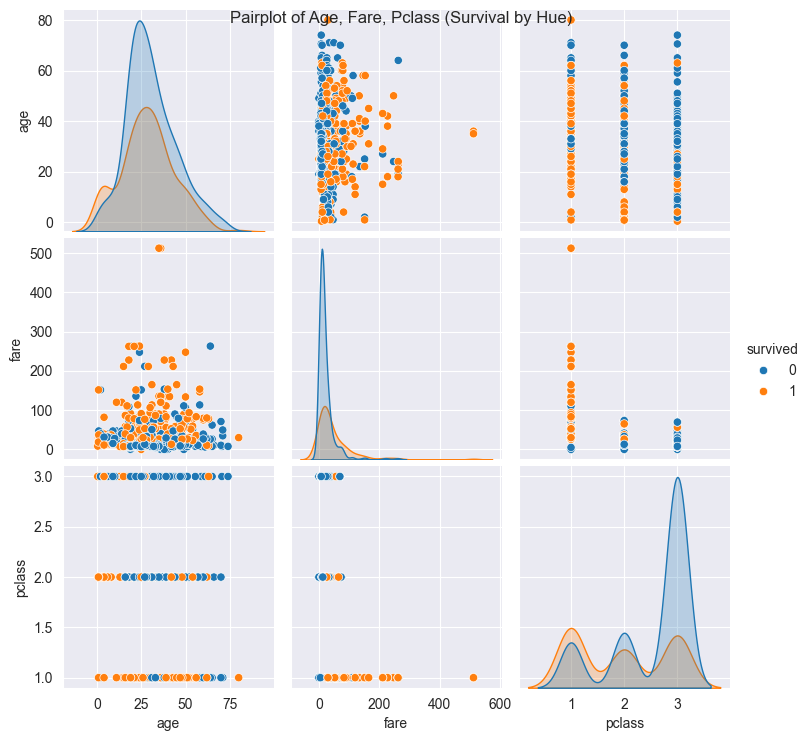

In [97]:
# Create a pairplot using Seaborn
sns.pairplot(titanic_df, vars=['age', 'fare', 'pclass'], hue='survived')
plt.suptitle('Pairplot of Age, Fare, Pclass (Survival by Hue)')
plt.show()

In [98]:
## Heatmap - Correlation between Features

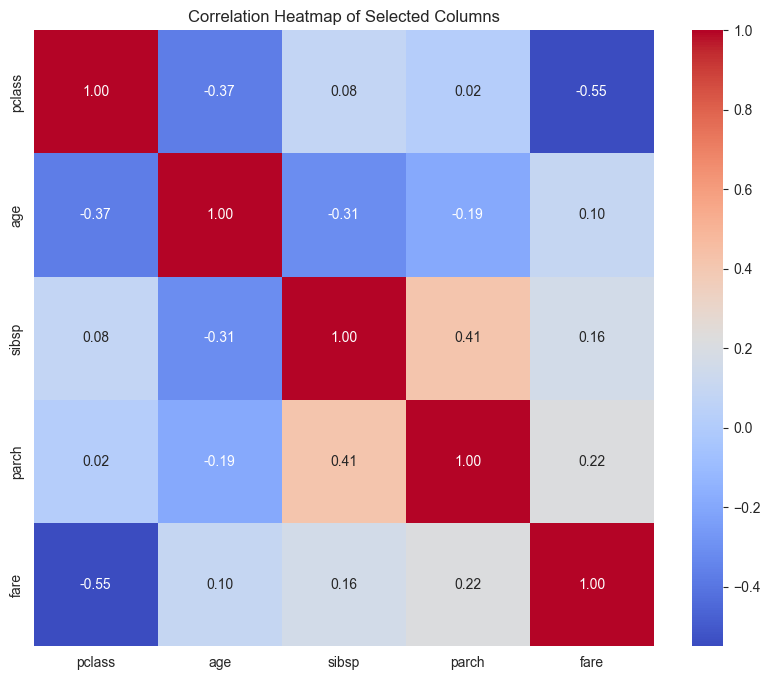

In [99]:
# we must remove some columns as non numeric
# Select columns for the heatmap
selected_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# Subset the DataFrame with selected columns
selected_data = titanic_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

## Joint Histogram
this shows the relationship between two variables, in this case, 'age' and 'fare' from the Titanic dataset. There are two parts:
Scatter Plot (Central Plot):
1. The central plot in the jointplot is a scatter plot. Each point on the scatter plot represents an individual passenger. The x-axis represents the 'age' of passengers, while the y-axis represents the 'fare' they paid. Each point's position shows the intersection of their age and fare.

2. Marginal Histograms (Top and Right Sides):
The top histogram shows the distribution of 'age', displaying how many passengers fall within specific age ranges. The right histogram displays the distribution of 'fare', showcasing the frequency of fare payments within certain price ranges.

These visualizations together allow us to observe both the individual distributions of 'age' and 'fare' and how they relate to each other. For instance, we can see if there are any concentrations of fares paid within certain age groups or if particular age groups tend to pay higher or lower fares.

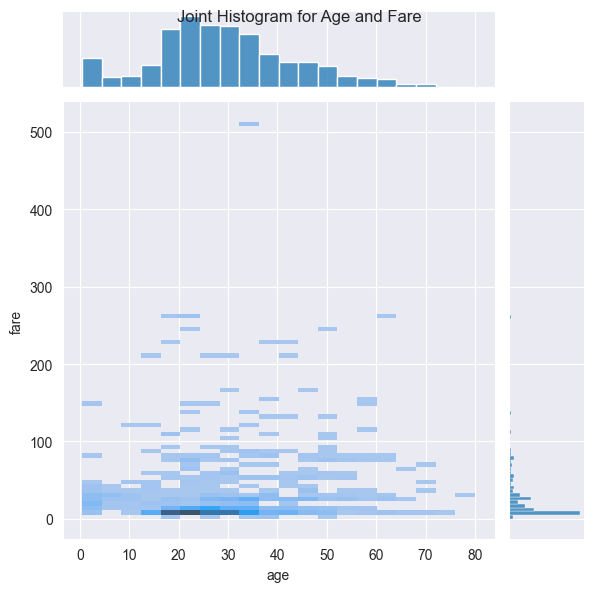

In [100]:

# Create a joint histogram using Seaborn's jointplot
sns.jointplot(x='age', y='fare', data=titanic_df, kind='hist')
plt.suptitle('Joint Histogram for Age and Fare')
plt.show()


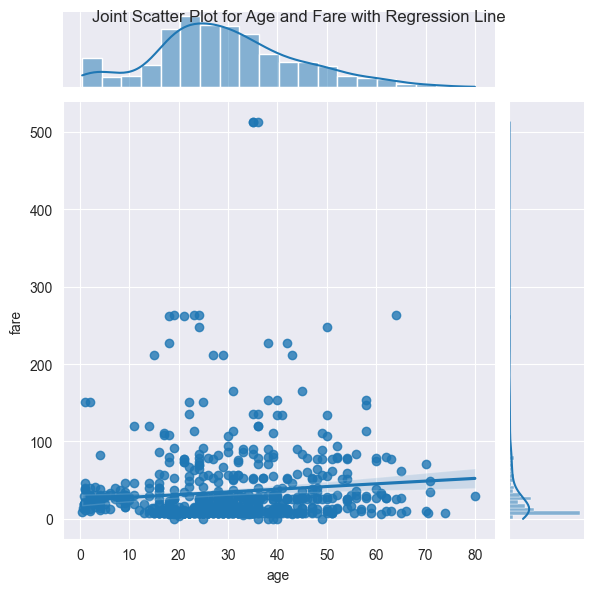

In [101]:
# Create a joint scatter plot with a regression line using Seaborn's jointplot
sns.jointplot(x='age', y='fare', data=titanic_df, kind='reg')
plt.suptitle('Joint Scatter Plot for Age and Fare with Regression Line')
plt.show()
